[View in Colaboratory](https://colab.research.google.com/github/jrandson/deep-learning/blob/master/Exploring_Underfinting_and_overfting.ipynb)

* tf.keras.layers
* tf.keras.Model
* tf.contrib.summary
* tfe.metrics
* object-based saving

So the model will work with the eager and graphs

import tensorflow as tf

tf.enable_eager_execution()

import tensorflow.contrib.eager as tfe 



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.1


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

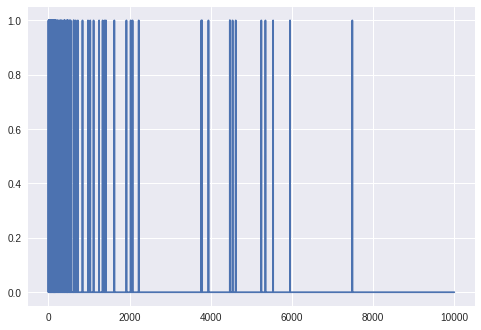

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5181 - acc: 0.8035 - binary_crossentropy: 0.5181 - val_loss: 0.3731 - val_acc: 0.8672 - val_binary_crossentropy: 0.3731
Epoch 2/20
 - 3s - loss: 0.2743 - acc: 0.9053 - binary_crossentropy: 0.2743 - val_loss: 0.2888 - val_acc: 0.8879 - val_binary_crossentropy: 0.2888
Epoch 3/20
 - 3s - loss: 0.1962 - acc: 0.9315 - binary_crossentropy: 0.1962 - val_loss: 0.2855 - val_acc: 0.8876 - val_binary_crossentropy: 0.2855
Epoch 4/20
 - 3s - loss: 0.1556 - acc: 0.9469 - binary_crossentropy: 0.1556 - val_loss: 0.3047 - val_acc: 0.8805 - val_binary_crossentropy: 0.3047
Epoch 5/20
 - 3s - loss: 0.1267 - acc: 0.9584 - binary_crossentropy: 0.1267 - val_loss: 0.3306 - val_acc: 0.8757 - val_binary_crossentropy: 0.3306
Epoch 6/20
 - 3s - loss: 0.1012 - acc: 0.9691 - binary_crossentropy: 0.1012 - val_loss: 0.3590 - val_acc: 0.8711 - val_binary_crossentropy: 0.3590
Epoch 7/20
 - 3s - loss: 0.0777 - acc: 0.9784 - binary_crossentropy:

In [13]:
epochs = baseline_history.epoch

history = baseline_history.history
history.keys()

dict_keys(['val_loss', 'val_acc', 'val_binary_crossentropy', 'loss', 'acc', 'binary_crossentropy'])

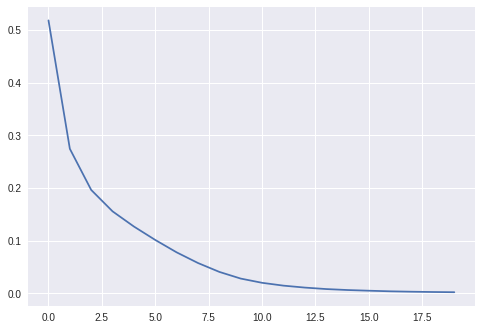

In [24]:
val_loss = history['val_loss']
loss = history['loss']
val_acc = history['val_acc']
acc = history['acc']

plt.plot(epochs, loss)
plt.show()

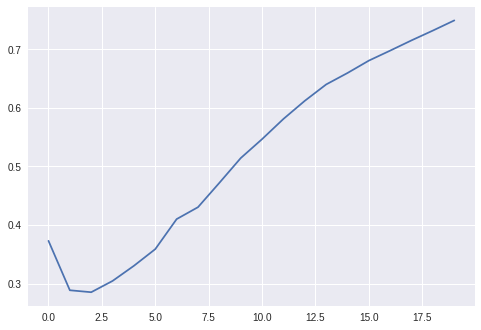

In [23]:

plt.plot(epochs, val_loss)
plt.show()

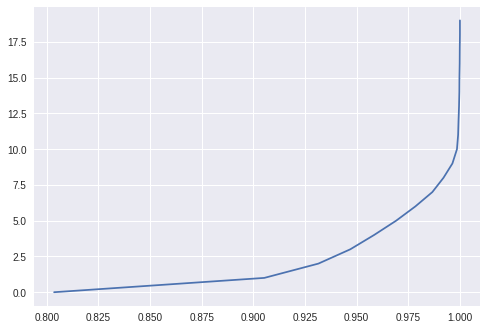

In [20]:
plt.plot(acc, epochs)
plt.show()

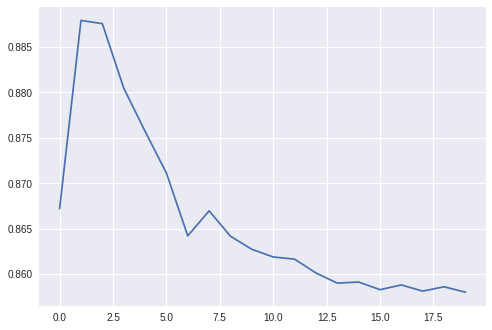

In [25]:
plt.plot(epochs, val_acc)
plt.show()